In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
df = pd.read_pickle('../TP3/data/simulation_runs_big.pkl')
df, df.shape

(        white_y  run           t  ball_count  kinetic_energy
 0          42.0    0    0.000000        16.0    3.300000e+06
 1          42.0    0    0.625462        16.0    3.300000e+06
 2          42.0    0    0.625874        16.0    3.300000e+06
 3          42.0    0    0.626083        16.0    3.300000e+06
 4          42.0    0    0.626284        16.0    3.300000e+06
 ...         ...  ...         ...         ...             ...
 195066     56.0  999  244.648747         2.0    2.478133e+03
 195067     56.0  999  289.479196         1.0    1.482570e+03
 195068     56.0  999  296.233391         1.0    1.482570e+03
 195069     56.0  999  347.818035         1.0    1.482570e+03
 195070     56.0  999  398.458046         0.0    0.000000e+00
 
 [3131070 rows x 5 columns],
 (3131070, 5))

In [3]:
df['duration'] = -df.groupby(['white_y', 'run'])['t'].diff(-1)
# df.to_csv('output.csv', index=False)
df

,white_y,run,t,ball_count,kinetic_energy,duration
0,42.0,0,0.000000,16.0,3.300000e+06,0.625462
1,42.0,0,0.625462,16.0,3.300000e+06,0.000412
2,42.0,0,0.625874,16.0,3.300000e+06,0.000208
3,42.0,0,0.626083,16.0,3.300000e+06,0.000202
4,42.0,0,0.626284,16.0,3.300000e+06,0.000421
...,...,...,...,...,...,...
195066,56.0,999,244.648747,2.0,2.478133e+03,44.830449
195067,56.0,999,289.479196,1.0,1.482570e+03,6.754195
195068,56.0,999,296.233391,1.0,1.482570e+03,51.584644
195069,56.0,999,347.818035,1.0,1.482570e+03,50.640010


# Ejercicio 1.1

In [28]:
# Primero filtro con los valores de white_y dentro del rango
white_y_values = set(range(47, 57))
filtered_df = df[df['white_y'].isin(white_y_values)]

df['white_y'].unique(), filtered_df['white_y'].unique()

(array([42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
        55., 56.]),
 array([47., 48., 49., 50., 51., 52., 53., 54., 55., 56.]))

In [29]:
# Obtener el numero de bins para el histograma por Regla de Sturges
n_bins_sturges = int(np.ceil(np.log2(len(filtered_df['duration']) + 1))) 
n_bins_sturges

21

Mean time between events: 2.246402881501507  14.617322173004851
Mean frequency of events: 1292.6508604730127


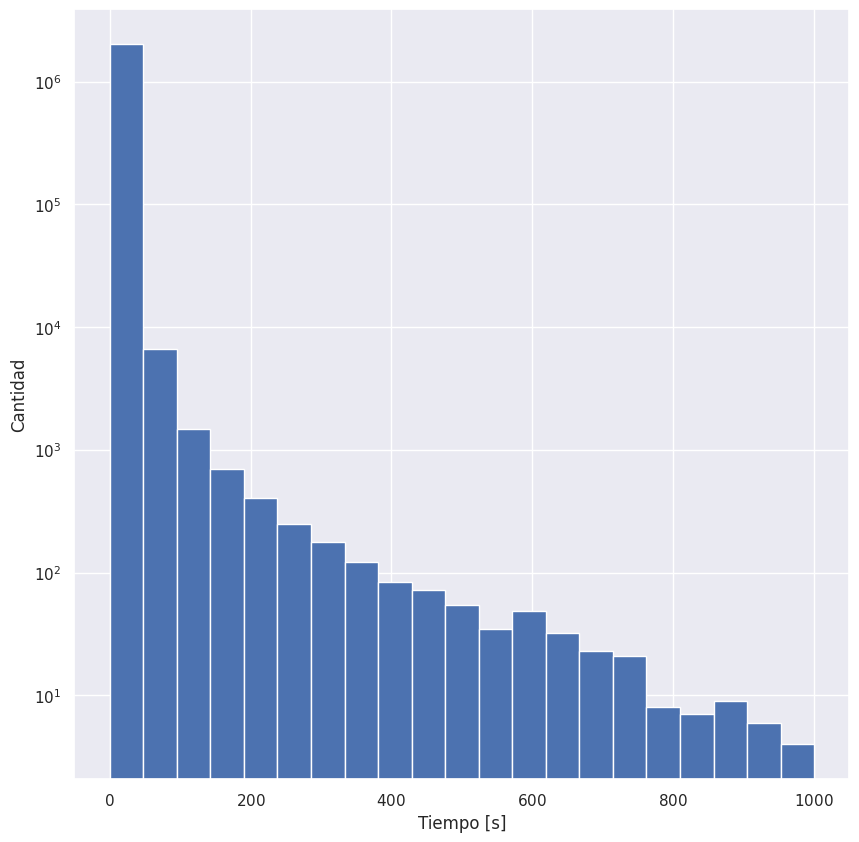

In [36]:
# Distribucion de tiempo entre eventos
ax = filtered_df['duration'].hist(bins=n_bins_sturges, range=[0, 1000])
ax.ticklabel_format(style='sci', useMathText=True)
ax.set_yscale('log')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Tiempo [s]')

# Tiempo medio entre eventos
print(f"Mean time between events: {filtered_df['duration'].mean()}  {filtered_df['duration'].std()}")
# Frecuencia media entre eventos
print(f"Mean frequency of events: {(1/filtered_df['duration']).mean()}")

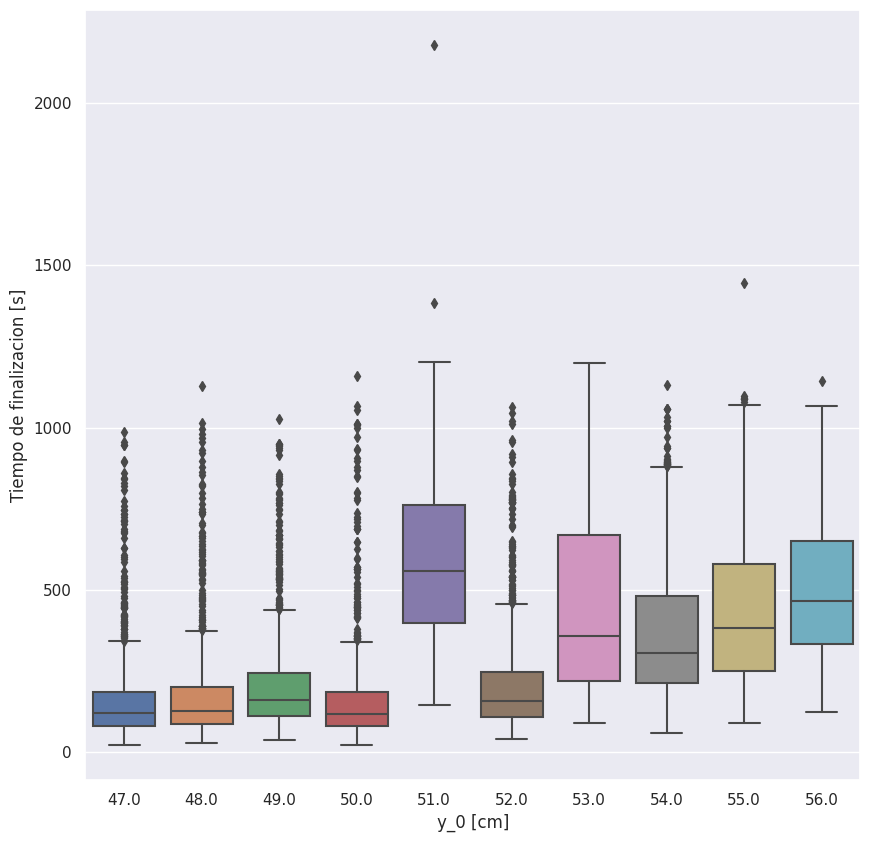

In [75]:
# Agarro los finales de las simulaciones
total = filtered_df[filtered_df['ball_count'] == 0].drop(columns=['ball_count', 'kinetic_energy', 'duration'])

#Distribucion de duracion total agrupados por la posicion de la blanca
ax = sns.boxplot(data=total, x ='white_y', y='t')

ax.set_ylabel('Tiempo de finalizacion [s]')
ax.set_xlabel('y_0 [cm]')
plt.show()